In [1]:
# KoNLPy (한국어 형태소 분석) 설치
!pip install konlpy

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
# vscode 버전 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows 환경 기준 나눔고딕 폰트 경로
font_path = 'c:/WINDOWS/Fonts/MALGUN.TTF'

# 폰트 등록
fm.fontManager.addfont(font_path)

# matplotlib에 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [8]:
from konlpy.tag import Okt
from collections import Counter
import re

# 1. 원문 텍스트 데이터 정의
text_data_beginner = """
여러 기능을 통합한 서비스
답변 1개
쉬운 투자 용어, 나의 투자 성향에 맞는 안전한 상품 추천, 분산된 정보를 하나의 서비스에서 제공
답변 1개
핵심정보만 골라서 알기 쉽게 요약
답변 1개
핵심정보 정확한 정보만 요약 하여 제공 필요
답변 1개
안전하고 높은 수익률 자동 추천 기능
답변 1개
투자수익율이 높은 가격이나 정보를 알아서 제공
답변 1개
자동 매수 매도를 하기 전에 컨펌 받고 하는 기능
답변 1개
다양한 정보를 모아서 알아 듣기 쉽게 제공하는 기능
답변 1개
별도로 투자 용어들 설명 필요.
답변 1개
핵심 정보만 골라서 알기 쉽게 요약하고 투자자의 관심종목을 제시하면 우량상품 추천 서비스 제공
답변 1개
쉬운 투자 용어설명
답변 1개
알기쉽게요약
답변 1개
투자 성향 분석 후 안전한 우량주 추천
답변 1개
쉬운투자 용어
답변 1개
자동 고수익투자
답변 1개
내 목표가에 맞는 자동 매수 및 매도
답변 1개
핵심만 골라 추천
답변 1개
잘모름
답변 1개
ㅇㅇ
답변 1개
초보자를위한 매뉴얼.안전한상품추천
답변 1개
종목별 매수 매도 타이밍
답변 1개
관심있는 종목에 대한 정보
답변 1개
"""

text_data_non_investor = """
요약된 뉴스 정보를 제공하는 서비스
답변 1개
쉬운 투자 용어필요.
답변 1개
그날 경제 뉴스 분석
답변 1개
핵심정보 요약
답변 1개
모든 니의투자 정보 쉽게 확인가능한 서비스
답변 1개
해당종목의 투자 성공률 표기
답변 1개
분산된 정보를 하나의 서비스에서 제공
답변 1개
다양한 기기에서 웹 화면이 출력되었으면 좋을 것 같습니다.
답변 1개
고령자를 위한 쉬운 시스템과 원격지원 서비스
답변 1개
"""

# 두 텍스트를 하나로 합치기
full_text = text_data_beginner + text_data_non_investor

# 2. 데이터 클리닝
cleaned_text = re.sub(r'답변 \d+개', '', full_text)
cleaned_text = re.sub(r'[a-zA-Z\n\.]', ' ', cleaned_text)
cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()


# 3. 형태소 분석 및 명사 추출 (Okt 사용)
okt = Okt()
nouns = okt.nouns(cleaned_text)

# 4. 불용어(Stopwords) 정의 및 제거
# 의미 없는 단어, 조사, 이모티콘 등 제거 (사용자 정의 불용어 추가)
stopwords = [
    '투자', '서비스', '제공'
]

# 한 글자 단어 및 불용어 제거
filtered_nouns = [
    word for word in nouns 
    if len(word) > 1 and word not in stopwords
]

# 5. 빈도수 계산
word_counts = Counter(filtered_nouns)

# 6. 워드 클라우드용 딕셔너리 생성
data_for_wordcloud_auto = dict(word_counts)

print("--- 자동 추출된 워드 클라우드 데이터 (빈도수) ---")
print(data_for_wordcloud_auto)

# --- 7. 빈도수를 기준으로 내림차순 정렬 추가 ---
# 딕셔너리의 items()를 기준으로, 각 항목(key-value 쌍)의 value(빈도수, 인덱스 1)를 기준으로 정렬
sorted_word_counts = sorted(
    data_for_wordcloud_auto.items(), 
    key=lambda item: item[1], 
    reverse=True # 내림차순 정렬
)

print("\n--- 빈도수 기준 내림차순 정렬 결과 ---")
# 튜플 리스트 형태 [(단어, 빈도), ...]로 출력됩니다.
for word, count in sorted_word_counts:
    print(f"'{word}': {count}")

--- 자동 추출된 워드 클라우드 데이터 (빈도수) ---
{'여러': 1, '기능': 4, '통합': 1, '용어': 5, '성향': 2, '상품': 3, '추천': 6, '분산': 2, '정보': 12, '하나': 2, '핵심': 5, '요약': 6, '필요': 3, '수익률': 1, '자동': 4, '수익': 2, '가격': 1, '매수': 3, '매도': 3, '컨펌': 1, '듣기': 1, '별도': 1, '설명': 2, '투자자': 1, '관심': 2, '종목': 4, '제시': 1, '우량': 2, '분석': 2, '목표': 1, '초보자': 1, '매뉴얼': 1, '타이밍': 1, '대한': 1, '뉴스': 2, '그날': 1, '경제': 1, '모든': 1, '확인가능': 1, '해당': 1, '공률': 1, '표기': 1, '기기': 1, '화면': 1, '출력': 1, '고령자': 1, '시스템': 1, '원격지원': 1}

--- 빈도수 기준 내림차순 정렬 결과 ---
'정보': 12
'추천': 6
'요약': 6
'용어': 5
'핵심': 5
'기능': 4
'자동': 4
'종목': 4
'상품': 3
'필요': 3
'매수': 3
'매도': 3
'성향': 2
'분산': 2
'하나': 2
'수익': 2
'설명': 2
'관심': 2
'우량': 2
'분석': 2
'뉴스': 2
'여러': 1
'통합': 1
'수익률': 1
'가격': 1
'컨펌': 1
'듣기': 1
'별도': 1
'투자자': 1
'제시': 1
'목표': 1
'초보자': 1
'매뉴얼': 1
'타이밍': 1
'대한': 1
'그날': 1
'경제': 1
'모든': 1
'확인가능': 1
'해당': 1
'공률': 1
'표기': 1
'기기': 1
'화면': 1
'출력': 1
'고령자': 1
'시스템': 1
'원격지원': 1


--- 상위 20개 키워드 및 빈도수 ---
{'정보': 12, '추천': 6, '요약': 6, '용어': 5, '핵심': 5, '기능': 4, '자동': 4, '종목': 4, '상품': 3, '필요': 3, '매수': 3, '매도': 3, '성향': 2, '분산': 2, '하나': 2, '수익': 2, '설명': 2, '관심': 2, '우량': 2, '분석': 2}


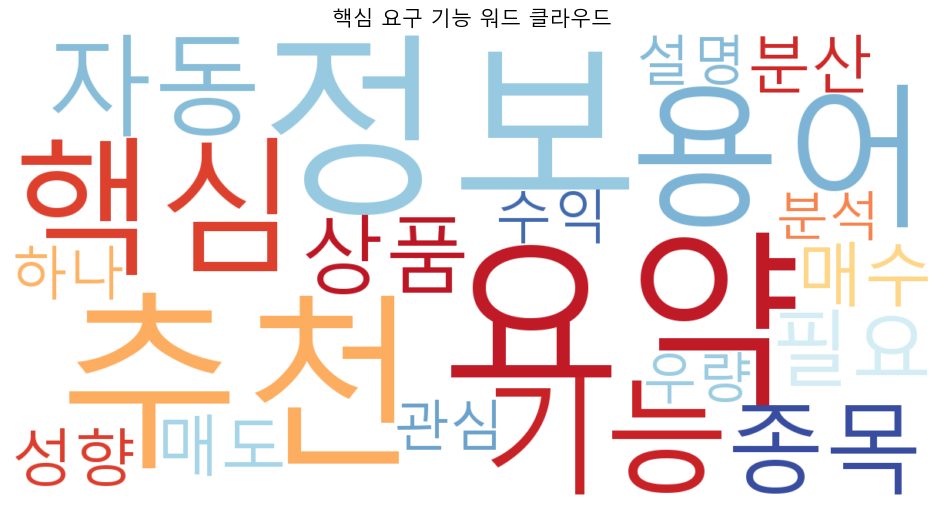

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

# --- 상위 20개 항목만 추출하여 새로운 딕셔너리 생성 ---
# (이전 코드에서 이미 내림차순 정렬된 sorted_word_counts 리스트를 사용)
top_20_words = dict(sorted_word_counts[:20])

print("--- 상위 20개 키워드 및 빈도수 ---")
print(top_20_words)

# 1. 폰트 경로 설정 (사용자 환경에 맞게 경로 지정 필요)
font_path = 'C:/Windows/Fonts/malgun.ttf' 

# 2. WordCloud 객체 생성 (***대비 강화 파라미터 추가/수정***)
wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    colormap='RdYlBu', 
    width=1200,
    height=600,
    prefer_horizontal=1.0, 
    
    # --- 대비 극대화 옵션 ---
    max_font_size=250,    # 최대 글자 크기 증가
    min_font_size=10,     # 최소 글자 크기 감소 (빈도 낮은 단어를 더 작게)
    relative_scaling=0.1  # 빈도수 스케일링을 0.1로 낮춰 대비 극대화
    # -----------------------
)

# 3. 상위 20개 딕셔너리로 워드 클라우드 생성
wordcloud.generate_from_frequencies(top_20_words) 

# 4. 시각화 (figure size도 가로형으로 수정)
plt.figure(figsize=(12, 6)) # figsize를 WordCloud width/height에 맞춰 가로형으로 수정
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('핵심 요구 기능 워드 클라우드', fontsize=15)
plt.axis('off') # 축 제거
plt.show()